In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
def crear_laberinto( tamanio, porcentaje_paredes, inicio=(0,0), meta=None ):
    laberinto = np.zeros((tamanio, tamanio))
    numero_paredes = int( (tamanio * tamanio ) * porcentaje_paredes / 100)

    for pared in range(numero_paredes):
        x,y = random.randint( 0, tamanio - 1 ),  random.randint( 0, tamanio - 1 )

        if(x,y) != inicio and ( meta is None or (x,y) != meta ):
            laberinto[x,y] = 1

    if meta:
        laberinto[meta] = 9
    else:
        while True:
            x,y = random.randint( 0, tamanio - 1 ),  random.randint( 0, tamanio - 1 )
            if laberinto[x,y] == 0 and (x,y) != inicio:
                laberinto[meta] = 9
                break
    return laberinto

In [18]:

def ver_laberinto(laberinto):
    plt.figure( figsize=(5,5) )
    plt.imshow(laberinto, cmap='hot', interpolation='nearest')
    plt.colorbar();

In [19]:
laberinto = crear_laberinto(10,20, inicio=(0,0), meta=(9,9))
laberinto


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 9.]])

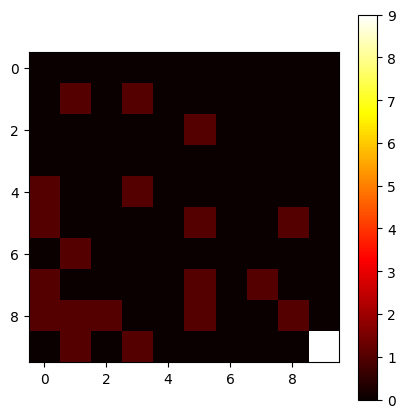

In [20]:
ver_laberinto(laberinto)

In [5]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
num_episodios = 500

In [6]:
def epsilon_codisioso(Q, estado, tamanio_estado):
    if random.uniform(0,1) < epsilon:
        return random.randint(0,3)
    else:
        return np.argmax(Q[estado])

        
    

In [7]:
def ejecutar_accion(estado, accion, laberinto, tamanio):
    fila, columna = divmod(estado, tamanio)
    if accion == 0 and fila > 0:
        fila -= 1
    elif accion == 1 and fila < tamanio -1:
        fila += 1
    elif accion == 2 and columna > 0:
        columna -= 1
    elif accion == 3 and columna < tamanio -1:
        columna += 1

    siguiente_estado = fila * tamanio + columna

    if laberinto[fila, columna] == 1:
        recompensa = -100
        siguiente_estado = estado
        terminado = False
    elif laberinto[fila, columna] == 9:
        recompensa = 100
        terminado = True
    else:
        recompensa = -1
        terminado = False

    return siguiente_estado, recompensa, terminado


In [8]:
def q_learning(laberinto, tamanio, inicio, meta):
    Q = np.zeros((tamanio * tamanio, 4))
    for episodio in range(num_episodios):
        estado = inicio
        terminado = False

        while not terminado:
            accion = epsilon_codisioso(Q, estado, tamanio)
            siguiente_estado, recompensa, terminado = ejecutar_accion(estado, accion, laberinto, tamanio)
            Q[estado, accion] += alpha * ( recompensa + gamma * max(Q[siguiente_estado])  - Q[estado, accion]) 
            estado = siguiente_estado
    return Q


In [9]:
def index_posicion(posicion, tamanio):
    return posicion[0] * tamanio + posicion[1]

In [10]:
tamanio = 10
posicion_inicio = (0,0)
posicion_meta = (9,9)
laberinto = crear_laberinto(tamanio, 20, inicio=posicion_inicio, meta = posicion_meta )
inicio = index_posicion(posicion_inicio, tamanio)
meta = index_posicion(posicion_meta, tamanio)
valores_Q = q_learning(laberinto, tamanio, inicio, meta)

In [14]:
def mostrar_ruta_aprendida(laberinto, Q, inicio, meta, tamanio):
    fila, columna = divmod(inicio, tamanio)
    ruta = [(fila, columna)]
    estado = inicio

    while estado != meta:
        accion = np.argmax(Q[estado])
        estado, _, _ = ejecutar_accion(estado, accion, laberinto, tamanio)
        fila, columna = divmod(estado, tamanio)
        ruta.append( (fila, columna) )
    plt.figure( figsize=(5,5) )
    plt.imshow(laberinto, cmap='hot', interpolation='nearest')
    filas, columnas = zip( *ruta )
    plt.plot( columnas, filas, marker='o', color='c' )
    plt.colorbar();

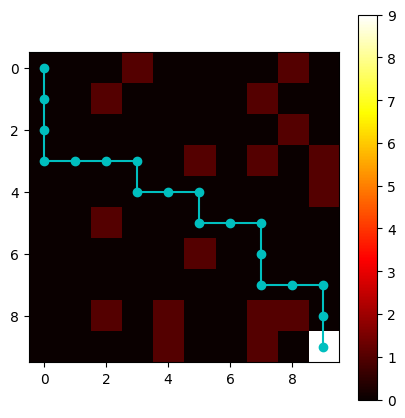

In [15]:
mostrar_ruta_aprendida(laberinto, valores_Q, inicio, meta, tamanio)